# DUSP1 Analysis and Visualization Notebook

This notebook demonstrates how to use the new analysis manager code from `Analysis_DUSP1.py`.

In this notebook, we will:
1. Load the processed CSV files (spots, clusters, and cell properties).
2. Instantiate the measurement manager (DUSP1Measurement) and compute cell-level metrics,
   with optional SNR filtering.
3. Create a DisplayManager instance to visualize gating overlays and cell crops.
4. (Optional) Use the new expression grouping and visualization functions.

Make sure that `Analysis_DUSP1.py` is in the same directory or on the Python path.

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dask.array as da
import os
import sys
import logging
import seaborn as sns

logging.getLogger('matplotlib.font_manager').disabled = True
numba_logger = logging.getLogger('numba')
numba_logger.setLevel(logging.WARNING)

matplotlib_logger = logging.getLogger('matplotlib')
matplotlib_logger.setLevel(logging.WARNING)

src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(src_path)
sys.path.append(src_path)

from src.Analysis_DUSP1_v2 import DUSP1AnalysisManager, SNRAnalysis, DUSP1Measurement, DUSP1DisplayManager

/Users/ericron/Desktop/AngelFISH


# Use the log file to search for analyses

In [2]:
loc = None
log_location = r'/Volumes/share/Users/Eric/GR_DUSP1_reruns'

In [3]:
am = DUSP1AnalysisManager(location=loc, log_location=log_location, mac=True) 

In [4]:
# list all analysis done 
all_analysis_names = am.list_analysis_names()

Analysis_DUSP1_F_Feb2025_BF75thQuartile_2025-02-20
Analysis_DUSP1_TS_R3_Final_2025-02-28
Analysis_DUSP1_TS_R3_001_2025-02-27
Analysis_DUSP1_J_ERonRunAll_2025-02-06
Analysis_DUSP1_E_Feb2025_BF75thQuartile_2025-02-20
Analysis_DUSP1_F_JacksRunAll_2025-02-06
Analysis_DUSP1_TS_R2_Final_2025-03-03
Analysis_DUSP1_J_NoThreshold_2025-02-22
Analysis_DUSP1_F_NoThreshold_2025-02-22
Analysis_DUSP1_I_Final_2025-03-05
Analysis_DUSP1_E_Final_2025-03-04
Analysis_DUSP1_N_Final2_2025-03-06
Analysis_DUSP1_TCS_R1_Final3_2025-03-11
Analysis_DUSP1_TS_R2_001_2025-02-26
Analysis_DUSP1_E_ERonRunAll_2025-02-06
Analysis_DUSP1_K_Final_2025-03-05
Analysis_DUSP1_D_Final_2025-03-04
Analysis_DUSP1_F_ERonReRun_2025-02-08
Analysis_DUSP1_CS_R1_Final3_2025-03-11
Analysis_DUSP1_TS_R1_Final_2025-03-03
Analysis_DUSP1_P_Final2_2025-03-06
Analysis_DUSP1_J_Feb2025_BF75thQuartile_2025-02-21
Analysis_DUSP1_F_Final_2025-03-05
Analysis_DUSP1_L_Final_2025-03-05
Analysis_DUSP1_H_Final_2025-03-05
Analysis_DUSP1_M_Final_2025-03-05
Anal

In [5]:
# Initiate the class and find analysis at log_location
# Select the specific analysis - ex. DUSP1 Dex Time-Concentration Sweep Replica 1
am.select_analysis('DUSP1_D_Final')
print('locations with this dataset:', am.location)

locations with this dataset: ['/Volumes/share/smFISH_images/Eric_smFISH_images/20220305/DUSP1_Dex_90min_20220224.h5', '/Volumes/share/smFISH_images/Eric_smFISH_images/20220305/DUSP1_Dex_120min_20220224.h5', '/Volumes/share/smFISH_images/Eric_smFISH_images/20220305/DUSP1_Dex_150min_20220224.h5', '/Volumes/share/smFISH_images/Eric_smFISH_images/20220304/DUSP1_Dex_75min_20220224.h5', '/Volumes/share/smFISH_images/Eric_smFISH_images/20220225/DUSP1_Dex_0min_20220224.h5', '/Volumes/share/smFISH_images/Eric_smFISH_images/20220225/DUSP1_Dex_20min_20220224.h5', '/Volumes/share/smFISH_images/Eric_smFISH_images/20220225/DUSP1_Dex_30min_20220224.h5', '/Volumes/share/smFISH_images/Eric_smFISH_images/20220305/DUSP1_Dex_180min_20220224.h5', '/Volumes/share/smFISH_images/Eric_smFISH_images/20220225/DUSP1_Dex_10min_20220224.h5', '/Volumes/share/smFISH_images/Eric_smFISH_images/20220304/DUSP1_Dex_60min_20220224.h5', '/Volumes/share/smFISH_images/Eric_smFISH_images/20220303/DUSP1_Dex_50min_20220224.h5', 

In [ ]:
# Load datasets
spots_df = am.select_datasets("spotresults", dtype="dataframe")
clusters_df = am.select_datasets("clusterresults", dtype="dataframe")
props_df = am.select_datasets("cell_properties", dtype="dataframe")
cellresults_df = am.select_datasets("cellresults", dtype="dataframe")

print("Spots shape:", spots_df.shape)
print("Clusters shape:", clusters_df.shape)
print("Cell properties shape:", props_df.shape)
print("Cell results shape:", cellresults_df.shape)

Opening file: /Volumes/share/smFISH_images/Eric_smFISH_images/20220305/DUSP1_Dex_90min_20220224.h5
Reading DataFrame from: /Volumes/share/smFISH_images/Eric_smFISH_images/20220305/DUSP1_Dex_90min_20220224.h5 -> Analysis_DUSP1_D_Final_2025-03-04/spotresults
Opening file: /Volumes/share/smFISH_images/Eric_smFISH_images/20220305/DUSP1_Dex_120min_20220224.h5
Reading DataFrame from: /Volumes/share/smFISH_images/Eric_smFISH_images/20220305/DUSP1_Dex_120min_20220224.h5 -> Analysis_DUSP1_D_Final_2025-03-04/spotresults
Opening file: /Volumes/share/smFISH_images/Eric_smFISH_images/20220305/DUSP1_Dex_150min_20220224.h5
Reading DataFrame from: /Volumes/share/smFISH_images/Eric_smFISH_images/20220305/DUSP1_Dex_150min_20220224.h5 -> Analysis_DUSP1_D_Final_2025-03-04/spotresults
Opening file: /Volumes/share/smFISH_images/Eric_smFISH_images/20220304/DUSP1_Dex_75min_20220224.h5
Reading DataFrame from: /Volumes/share/smFISH_images/Eric_smFISH_images/20220304/DUSP1_Dex_75min_20220224.h5 -> Analysis_DUSP1

## Step 2: Compute Cell-Level Metrics with Different SNR Filtering Methods

We create three DUSP1Measurement objects (or re-use one with different filtering options)
to compare the following methods:
- Weighted: uses weighted thresholding based on 'snr'.
- Absolute: keeps spots with snr >= 4.
- MG: computes MG_SNR and keeps spots with MG_SNR >= 'snr'.

Note: Adjust the snr_threshold for MG if needed.

In [9]:
snr_df = SNRAnalysis(spots_df, props_df, clusters_df, abs_threshold=4)

In [13]:
merged_spots_df, merged_clusters_df, merged_cellprops_df = snr_df.get_results()

In [ ]:
print('Number of spots:', merged_spots_df['unique_spot_id'].count())
print('Number of cells:', len(merged_spots_df['unique_cell_id'].unique()))
print('Numcer of cells from cell properties:', len(merged_cellprops_df['unique_cell_id'].unique()))

Number of spots: 2041174
Number of cells: 5426
Numcer of cells from cell properties: 5439


In [ ]:
# Extract unique combinations from both dataframes
cellprops_combos = set(merged_cellprops_df[['NAS_location', 'cell_label', 'fov']].apply(tuple, axis=1))
spots_combos = set(merged_spots_df[['NAS_location', 'cell_label', 'fov']].apply(tuple, axis=1))

# Find combinations in cellprops but not in spots
missing_combos = cellprops_combos - spots_combos

# Display results
print(f"Number of unique cell combinations in cellprops: {len(cellprops_combos)}")
print(f"Number of unique cell combinations in spots: {len(spots_combos)}")
print(f"Number of missing combinations: {len(missing_combos)}")

# Display a few missing combinations for inspection
if missing_combos:
    print("\nSample of missing combinations (NAS_location, cell_label, fov):")
    for combo in list(missing_combos)[:5]:  # Show first 5 examples
        print(combo)
        
    # Get complete details for these missing cells
    missing_cells = merged_cellprops_df[merged_cellprops_df[['NAS_location', 'cell_label', 'fov']].apply(tuple, axis=1).isin(missing_combos)]
    print(f"\nTotal missing cells: {len(missing_cells)}")
    print("\nProperties of missing cells:")
    print(missing_cells[['NAS_location', 'cell_label', 'fov', 'unique_cell_id']].head())

In [ ]:
import dask.array as da
import h5py 
import matplotlib.pyplot as plt

def displaycell(row, channel):
    with h5py.File(row['NAS_location']) as f:
        imgs = da.asarray(f['raw_images'])
        img = imgs[row['fov'], 0, channel, 0]
        plt.imshow(img)
        plt.show()



In [22]:
merged_spots_df.to_csv('DUSP1_D_merged_spots_Mar2025.csv')

In [29]:
merged_spots_df['mg_lt_snr'].unique()

array([1, 0])

In [30]:
#TODO: check why there are missing cells in the spots dataframe

# Compute the set of unique cell IDs in each DataFrame.
cellprops_ids = set(merged_cellprops_df['unique_cell_id'].unique())
spots_ids = set(merged_spots_df['unique_cell_id'].unique())

# Determine the missing cell IDs (cells in cellprops but not in spots).
missing_cell_ids = cellprops_ids - spots_ids
print("Missing cell IDs:", missing_cell_ids)
print("Number of missing cells:", len(missing_cell_ids))

# Retrieve the rows from cellprops corresponding to these missing cell IDs.
missing_cells_details = merged_cellprops_df[merged_cellprops_df['unique_cell_id'].isin(missing_cell_ids)]
print("Missing cell details:")
print(missing_cells_details)

Missing cell IDs: {np.int64(3968), np.int64(3969), np.int64(2147), np.int64(3977), np.int64(1130), np.int64(2988), np.int64(2957), np.int64(110), np.int64(111), np.int64(112), np.int64(2194), np.int64(115), np.int64(116), np.int64(3961)}
Number of missing cells: 14
Missing cell details:
      nuc_label  nuc_bbox-0  nuc_bbox-1  nuc_bbox-2  nuc_bbox-3  nuc_area  \
110          12         684         309         796         412    8497.0   
111          13         718         462         837         578   10307.0   
112          11         550         551         667         640    8012.0   
115          14         818         115         936         204    8878.0   
116          15         896         242         936         329    2475.0   
1130         15         850         572         936         640    4574.0   
2147          4         169         592         260         640    3389.0   
2194         16         814         609         888         640    1816.0   
2957         22    

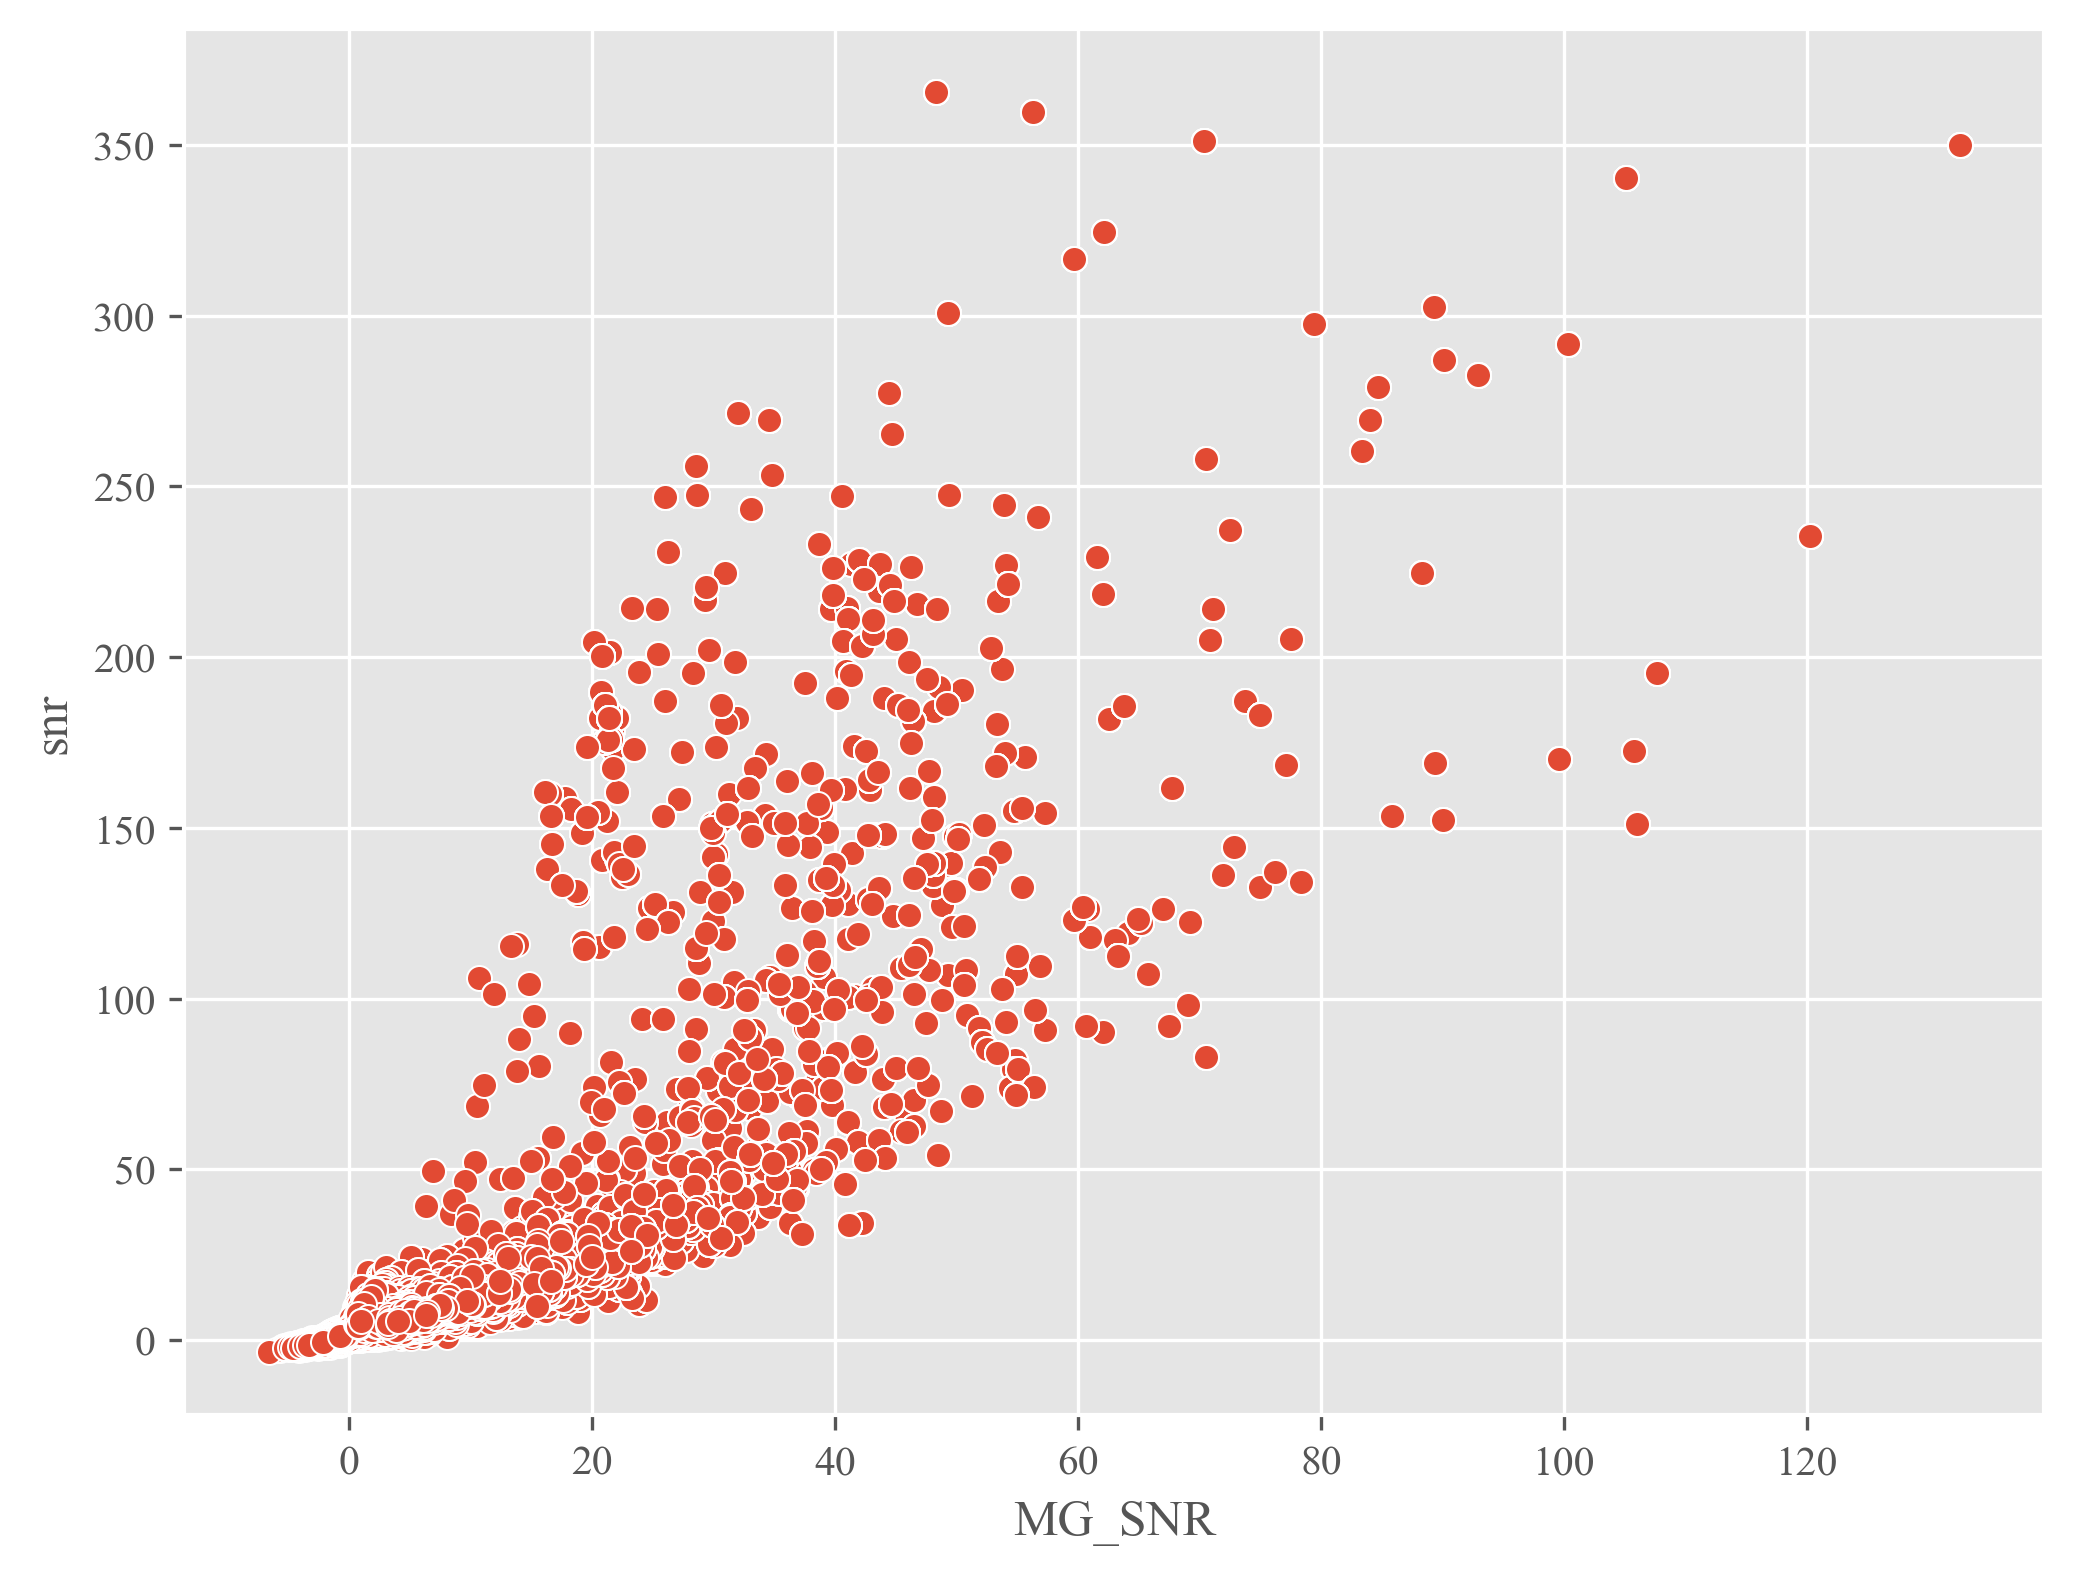

In [25]:
# Look at the mg_snr values compared to the snr values
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.scatterplot(data=merged_spots_df, x='MG_SNR', y='snr', ax=ax)
ax.set_xlabel('MG_SNR')
ax.set_ylabel('snr')
plt.show()

In [ ]:
# Create an instance of the DUSP1Measurement class.
dusp = DUSP1Measurement(spots_df, clusters_df, props_df)

# Process the data with a chosen SNR threshold 
cell_level_results = dusp.measure(snr_threshold=4)

# Now cell_level_results is a cell-level dataframe that you can use for comparisons,
# downstream analysis, or plotting with your preferred tools.
print(cell_level_results.head())

In [ ]:
cell_level_results.to_csv('TCS_R1_cell_level_results_snr4_Mar19.csv')

In [ ]:
cell_level_results.keys()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of metrics corresponding to different thresholding methods
metrics = ['weighted_count', 'absolute_count', 'MG_count', 'num_spots']

# Ensure concentrations are sorted
concentrations = sorted(cell_level_results['dex_conc'].unique())

# Set common aesthetics
sns.set_context('talk')
sns.set_style('whitegrid')

# ========= 1. Histograms =========
# For each concentration, create a figure with a histogram for each metric.
for conc in concentrations:
    fig, axes = plt.subplots(1, len(metrics), figsize=(5 * len(metrics), 5))
    fig.suptitle(f'Histograms for Concentration {conc} nM', fontsize=16)
    
    for i, metric in enumerate(metrics):
        ax = axes[i]
        # Get baseline (0 min) data for the current concentration and plot histogram
        baseline = cell_level_results[(cell_level_results['dex_conc'] == conc) &
                                      (cell_level_results['time'] == 0)]
        sns.histplot(baseline[metric], bins=50, kde=True, color='gray', 
                     label='0 min', ax=ax, stat='density')
        
        # Get data for nonzero timepoints and overlay histograms
        nonzero = cell_level_results[(cell_level_results['dex_conc'] == conc) &
                                     (cell_level_results['time'] > 0)]
        timepoints = sorted(nonzero['time'].unique())
        for t in timepoints:
            subset = nonzero[nonzero['time'] == t]
            sns.histplot(subset[metric], bins=50, kde=True, ax=ax, 
                         label=f'{t} min', alpha=0.6, stat='density')
        
        ax.set_title(metric)
        ax.set_xlabel(metric)
        ax.set_ylabel('Density')
        ax.legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# ========= 2. Line Plots =========
# For each concentration, create a figure with a line plot for each metric.
# Here we plot the mean metric value over time (including 0 min).
for conc in concentrations:
    fig, axes = plt.subplots(1, len(metrics), figsize=(5 * len(metrics), 5))
    fig.suptitle(f'Line Plots for Concentration {conc} nM', fontsize=16)
    
    for i, metric in enumerate(metrics):
        ax = axes[i]
        # Group by time to compute the mean for each metric
        df_grouped = cell_level_results[cell_level_results['dex_conc'] == conc] \
                     .groupby('time')[metric].mean().reset_index()
        sns.lineplot(data=df_grouped, x='time', y=metric, marker='o', ax=ax)
        
        ax.set_title(metric)
        ax.set_xlabel('Time (min)')
        ax.set_ylabel(f'Mean {metric}')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# ========= 3. Bar Plots =========
# For each concentration, create a figure with a bar plot for each metric.
# Again, the bars display the average metric value at each timepoint.
for conc in concentrations:
    fig, axes = plt.subplots(1, len(metrics), figsize=(5 * len(metrics), 5))
    fig.suptitle(f'Bar Plots for Concentration {conc} nM', fontsize=16)
    
    for i, metric in enumerate(metrics):
        ax = axes[i]
        df_grouped = cell_level_results[cell_level_results['dex_conc'] == conc] \
                     .groupby('time')[metric].mean().reset_index()
        sns.barplot(data=df_grouped, x='time', y=metric, ax=ax, palette='viridis')
        
        ax.set_title(metric)
        ax.set_xlabel('Time (min)')
        ax.set_ylabel(f'Mean {metric}')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [ ]:
clusters_df.keys()

In [ ]:
spots_df.keys()

In [ ]:
# Create an instance of the display manager
display_manager = DUSP1DisplayManager(am, cell_level_results)

# Run the display routine; this will pop up figures inline.
display_manager.display(newFOV=True, newCell=True, spotChannel=0, cytoChannel=1, nucChannel=2)

In [ ]:
am.close()